1. Построить на одном графике графики плотностей N (0, k), k = 1, ..., n (например, для n = 7).

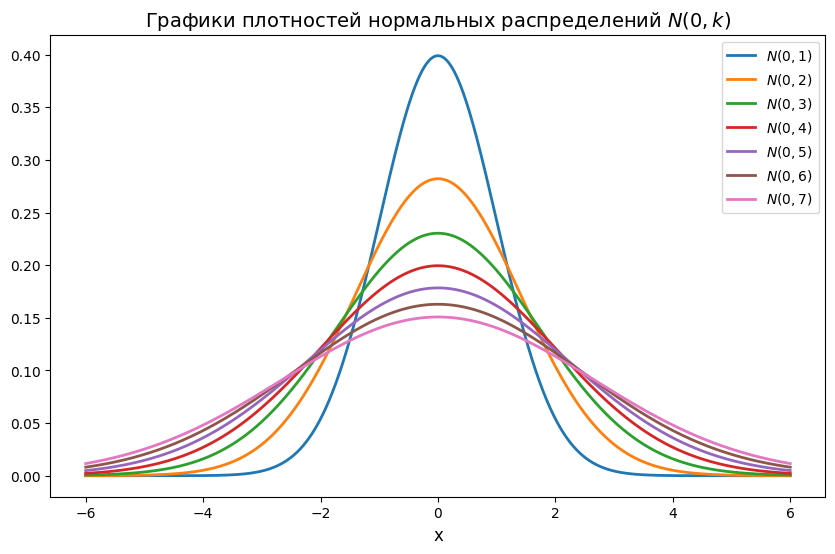

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
n = 7
x = np.linspace(-6, 6, 1000)

for k in range(1, n + 1):
    y = (1 / (np.sqrt(2 * np.pi * k))) * np.exp(-x**2 / (2 * k))
    
    plt.plot(x, y, label=f'$N(0,{k})$', linewidth=2)

plt.title('Графики плотностей нормальных распределений $N(0,k)$', fontsize=14)
plt.xlabel('x', fontsize=12)
plt.legend()
plt.show()
#Когда мы строим графики, мы указываем label для каждого
#plt.plot(x, y1, label='Первая линия')
#plt.plot(x, y2, label='Вторая линия')
#plt.plot(x, y3, label='Третья линия')

#plt.legend() собирает все эти label и показывает их в легенде

2. Моделировать 1000 реализаций с.в. X ∼ Bin(100, 0.04) и с.в. Y ∼ Poiss(4). Построить столбцовые
диаграммы отдельно и на одном графике, сравнить. То же для X ∼ Bin(1000, 0.004) и X ∼
Bin(10, 0.4).

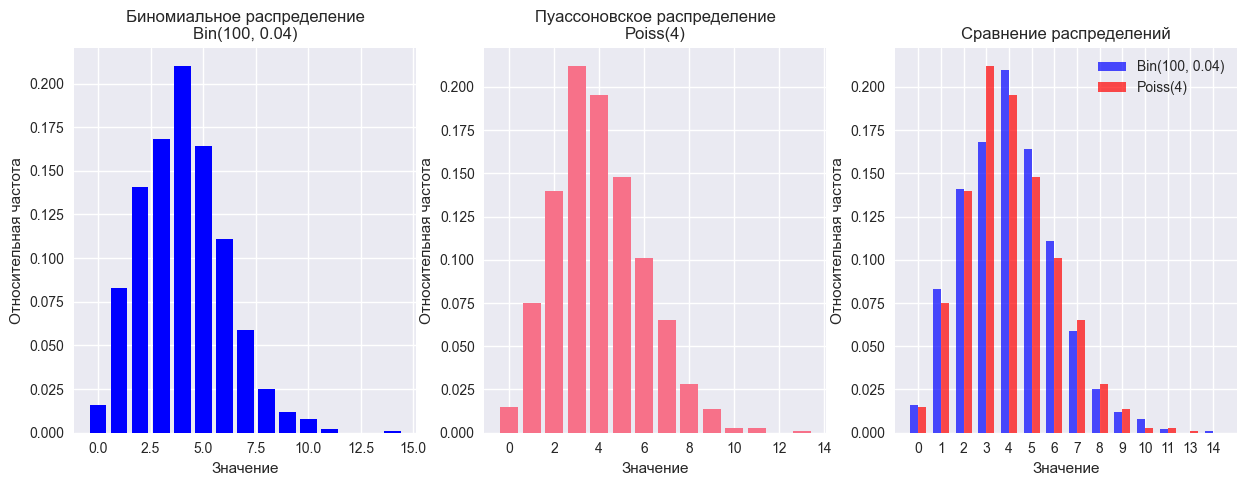

In [42]:
#1) Bin(100, 0.04) и Poiss(4)
# Генерируем 1000 реализаций
n_sim = 1000
X_binomial = np.random.binomial(n=100, p=0.04, size=n_sim)
Y_poisson = np.random.poisson(lam=4, size=n_sim)

# Строим отдельные графики
plt.figure(figsize=(15, 5))

# График 1: Биномиальное распределение
plt.subplot(1, 3, 1) #То есть: 1 строка, 3 столбца, всего 3 места для графиков.
unique_x, counts_x = np.unique(X_binomial, return_counts=True)

#print("Уникальные значения:", unique)
#print("Количество каждого:", counts)
#print("Относительные частоты:", counts/1000)
plt.bar(unique_x, counts_x/n_sim, color = 'blue')
plt.xlabel('Значение')
plt.ylabel('Относительная частота')
plt.title('Биномиальное распределение\nBin(100, 0.04)')

# График 2: Пуассоновское распределение
plt.subplot(1, 3, 2)
unique_y, counts_y = np.unique(Y_poisson, return_counts=True)
plt.bar(unique_y, counts_y/n_sim)
plt.xlabel('Значение')
plt.ylabel('Относительная частота')
plt.title('Пуассоновское распределение\nPoiss(4)')

# График 3: Совмещенный
plt.subplot(1, 3, 3)

# Объединяем все уникальные значения и сортируем
all_values = sorted(set(unique_x) | set(unique_y))

freq_x_dict = {val: count/n_sim for val, count in zip(unique_x, counts_x)}
freq_y_dict = {val: count/n_sim for val, count in zip(unique_y, counts_y)}

freq_x = [freq_x_dict.get(val, 0) for val in all_values] #список относительных частот для ВСЕХ значений из all_values. Если значение было только во втором распределении, ставится 0
freq_y = [freq_y_dict.get(val, 0) for val in all_values]
width = 0.35
x_pos = np.arange(len(all_values)) #len(all_values) - количество уникальных значений
plt.bar(x_pos - width/2, freq_x, width, alpha=0.7, color='blue', label='Bin(100, 0.04)')
plt.bar(x_pos + width/2, freq_y, width, alpha=0.7, color='red', label='Poiss(4)')
plt.xticks(x_pos, all_values)
plt.xlabel('Значение')
plt.ylabel('Относительная частота')
plt.title('Сравнение распределений')
plt.legend()

plt.show()




3. Построить гистограммы баллов по математике и по русскому: а) по отдельности, б) на одном
графике, сравнить их.

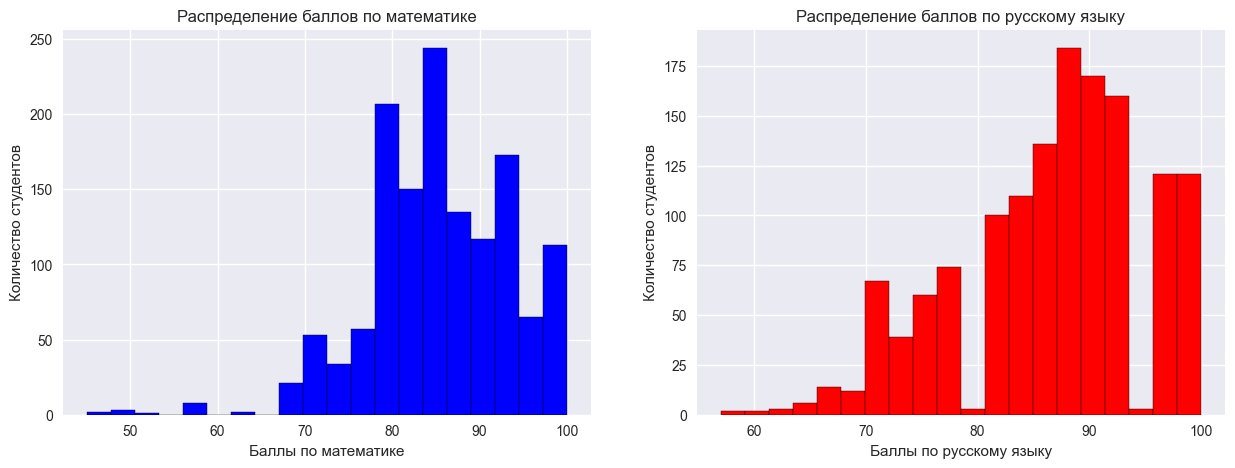

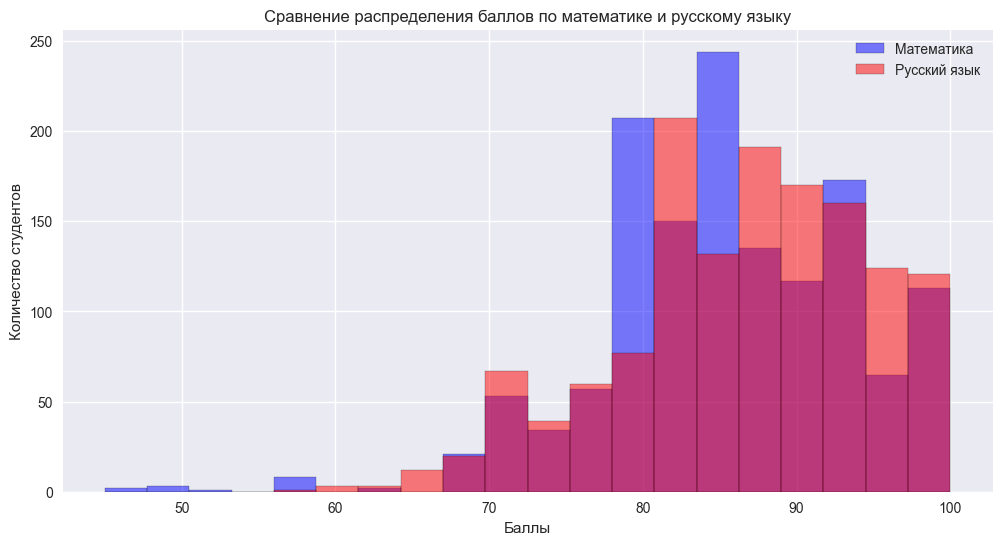

In [33]:
df = pd.read_csv('Priem.csv', sep=';', encoding='cp1251')

math_scores = df['ЕГЭ...матем.'] 
russian_scores = df['ЕГЭ...рус.яз.'] 

plt.figure(figsize=(15, 5))

# Гистограмма баллов по математике
plt.subplot(1, 2, 1)
plt.hist(math_scores, bins=20, color='blue', edgecolor='black')
plt.xlabel('Баллы по математике')
plt.ylabel('Количество студентов')
plt.title('Распределение баллов по математике')

# Гистограмма баллов по русскому языку
plt.subplot(1, 2, 2)
plt.hist(russian_scores, bins=20, color='red', edgecolor='black')
plt.xlabel('Баллы по русскому языку')
plt.ylabel('Количество студентов')
plt.title('Распределение баллов по русскому языку')

plt.show()

# б) Гистограммы на одном графике
plt.figure(figsize=(12, 6))

# Определяем общие границы для bin'ов чтобы гистограммы были сопоставимы
min_score = min(math_scores.min(), russian_scores.min())
max_score = max(math_scores.max(), russian_scores.max())
bins = np.linspace(min_score, max_score, 21)  # 20 интервалов
#np.linspace создает массив равномерно распределенных чисел
# Строим обе гистограммы на одном графике
plt.hist(math_scores, bins=bins, alpha=0.5, color='blue', label='Математика', edgecolor='black')
plt.hist(russian_scores, bins=bins, alpha=0.5, color='red', label='Русский язык', edgecolor='black')

plt.xlabel('Баллы')
plt.ylabel('Количество студентов')
plt.title('Сравнение распределения баллов по математике и русскому языку')
plt.legend()
plt.show()

4. Построить диаграмму рассеяния для массива mtcars, отложив по осям disp (объем двигателя) и
qsec (время для проезда 1/4 мили).

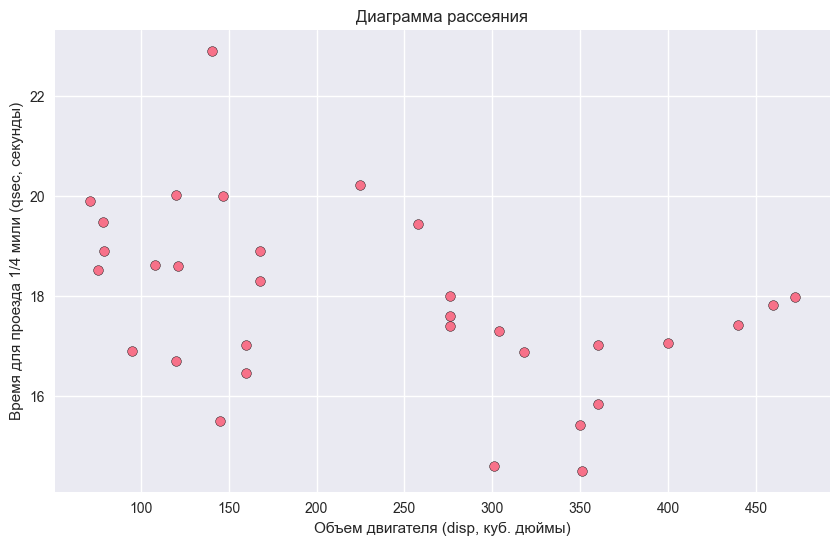

In [48]:
df = pd.read_csv('mtcars.csv', sep=',', encoding='cp1251')
plt.figure(figsize=(10, 6))

# Диаграмма рассеяния
plt.scatter(x=df['disp'], y=df['qsec'], edgecolor='black')

plt.xlabel('Объем двигателя (disp, куб. дюймы)')
plt.ylabel('Время для проезда 1/4 мили (qsec, секунды)')
plt.title('Диаграмма рассеяния')

plt.show()

5. Построить диаграмму рассеяния для тех же переменных, разными цветами отметив количество
цилиндров (cyl).

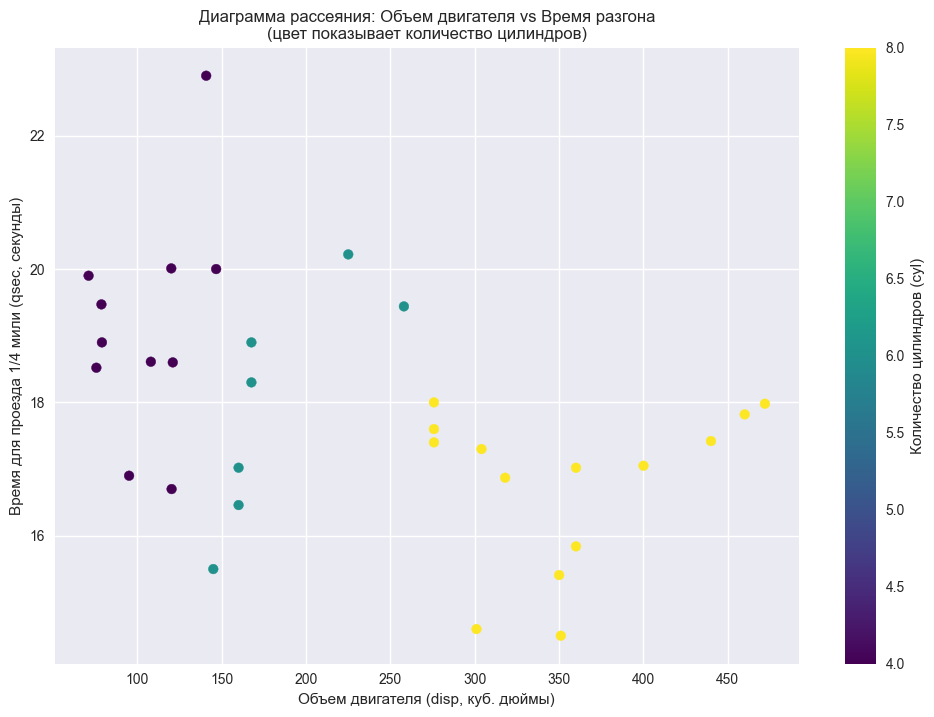

In [51]:
plt.figure(figsize=(12, 8))

scatter = plt.scatter(x=df['disp'], y=df['qsec'], c=df['cyl'], 
                      cmap='viridis')#количества цилиндров

# Добавляем colorbar (шкалу цветов)
cbar = plt.colorbar(scatter)
cbar.set_label('Количество цилиндров (cyl)')

# Настраиваем оси и заголовок
plt.xlabel('Объем двигателя (disp, куб. дюймы)')
plt.ylabel('Время для проезда 1/4 мили (qsec, секунды)')
plt.title('Диаграмма рассеяния: Объем двигателя vs Время разгона\n(цвет показывает количество цилиндров)')

plt.show()

6. Построить диаграмму рассеяния для тех же переменных, размерами точек показав вид двига-
теля (V-образный 0, иначе 1), цветом – число цилиндров, формой – коробку передач (am, 0 = автоматическая, 1 = ручная).

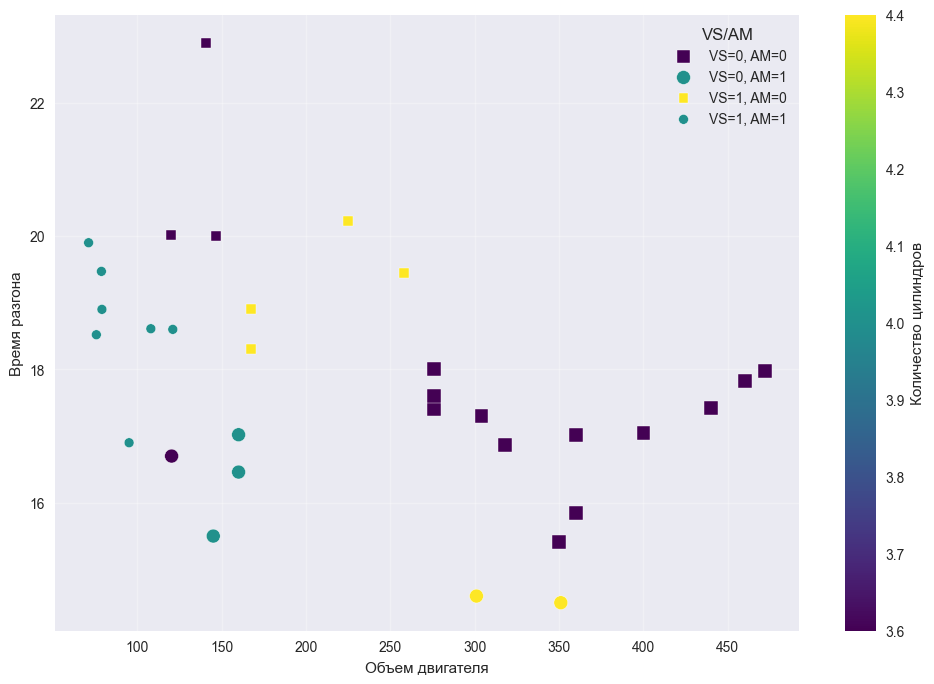

In [56]:
plt.figure(figsize=(12, 8))

# Проходим по всем комбинациям тип_двигателя × коробка_передач
for vs in [0, 1]:      # vs: 0=V-образный, 1=другой
    for am in [0, 1]:  # am: 0=автоматическая, 1=ручная
        subset = df[(df['vs'] == vs) & (df['am'] == am)]
        
        if len(subset) > 0:
            sizes = 100 if vs == 0 else 50   # V-образные двигатели больше
            marker = 's' if am == 0 else 'o' # квадрат=авто, круг=ручная
            
            plt.scatter(subset['disp'], subset['qsec'], c=subset['cyl'], cmap='viridis', s=sizes, marker=marker,        # форма = коробка передач
                       edgecolor='white', label=f'VS={vs}, AM={am}')

cbar = plt.colorbar()
cbar.set_label('Количество цилиндров')
plt.xlabel('Объем двигателя')
plt.ylabel('Время разгона')
plt.legend(title='VS/AM')
plt.grid(True, alpha=0.3)
plt.show()

7. Для массива данных "tips" построить boxplot() для размера чаевых по дням недели.

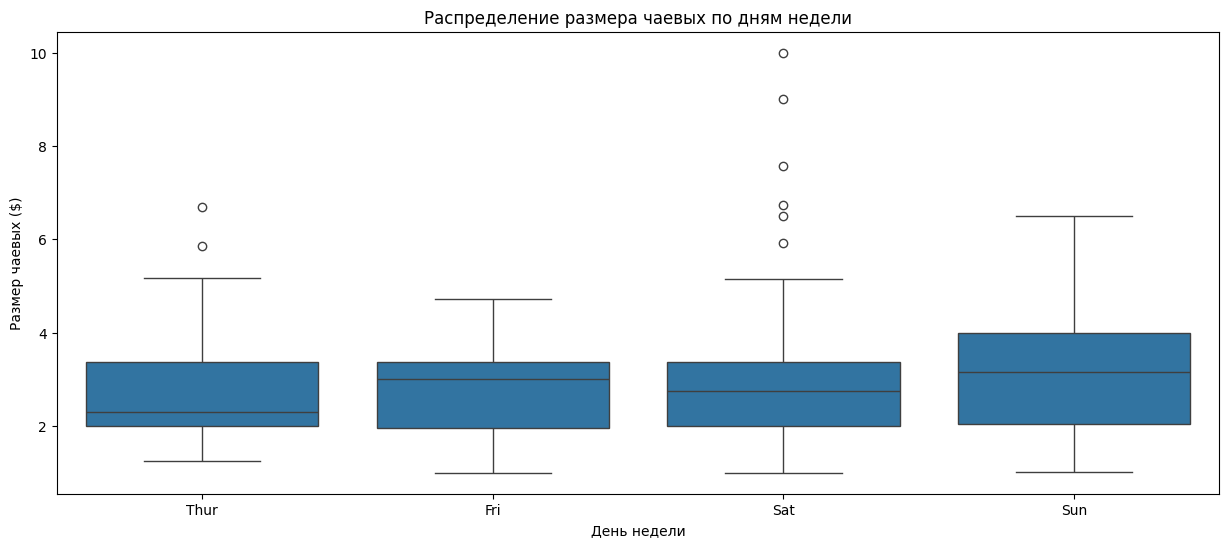

In [5]:
tips = sns.load_dataset('tips')

plt.figure(figsize=(15, 6))
sns.boxplot(data=tips, x='day', y='tip')
plt.title('Распределение размера чаевых по дням недели')
plt.xlabel('День недели')
plt.ylabel('Размер чаевых ($)')
plt.show()

8. Для массива данных "titanic" сравнить выживших и невыживших пассажиров с помощью параллельных координат, используя столбцы survived, pclass, who (нужно будет присвоить числовые значения), age. (Не стоит использовать весь массив, лучше выбрать случайным образом 30 строк).

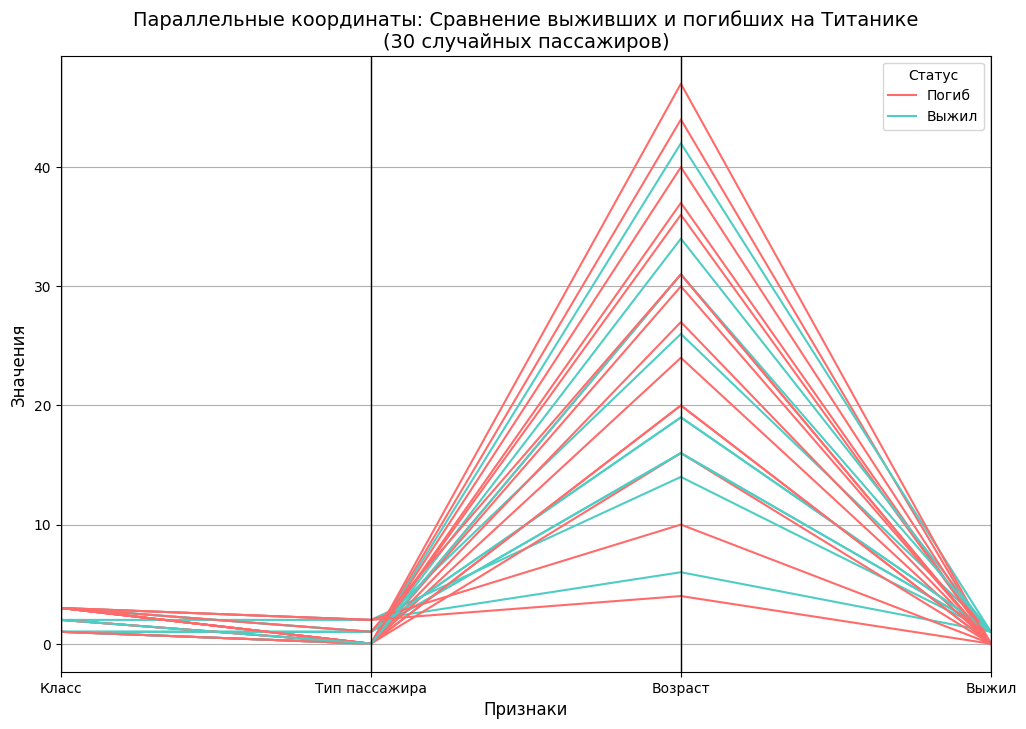

In [8]:
from pandas.plotting import parallel_coordinates

titanic = sns.load_dataset('titanic')

# Выбираем случайные 30 строк
sample_titanic = titanic.sample(n=30, random_state=42)

# Создаем копию DataFrame только с нужными столбцами. .copy() предотвращает предупреждения о изменении исходных данных
df = sample_titanic[['survived', 'pclass', 'who', 'age']].copy()

# Преобразуем столбец 'who' в числовые значения
who_mapping = {'man': 0, 'woman': 1, 'child': 2}
df['who_numeric'] = df['who'].map(who_mapping)

# Удаляем строки с пропущенными значениями
df = df.dropna()

# Создаем столбец для цветовой группировки (выжившие/невыжившие)
df['survived_label'] = df['survived'].map({0: 'Погиб', 1: 'Выжил'})

# Строим параллельные координаты
plt.figure(figsize=(12, 8))
parallel_coordinates(df[['pclass', 'who_numeric', 'age', 'survived', 'survived_label']], 
                    'survived_label',
                    color=['#FF6B6B', #погиб
                           '#4ECDC4']) #выжил

plt.title('Параллельные координаты: Сравнение выживших и погибших на Титанике\n(30 случайных пассажиров)', 
          fontsize=14)
plt.xlabel('Признаки', fontsize=12)
plt.ylabel('Значения', fontsize=12)

# Настраиваем подписи осей
plt.xticks([0, 1, 2, 3], ['Класс', 'Тип пассажира', 'Возраст', 'Выжил'])

# Настраиваем легенду
plt.legend(title='Статус', loc='upper right')

plt.show()